In [1]:
import sympy as sym
import numpy as np
sym.init_printing(use_latex=True)

## Solving a system of equations

Note that when we set equations equal to each other and solve the system, we are trying to find points of intersection between each equation (each equation is a graph on its own)

In [2]:
x,y,z,q = sym.symbols('x,y,z,w')
eq1 = sym.Eq(x+y,5)
eq2 = sym.Eq(x**2+y**2,17)
result = sym.solve([eq1,eq2],(x,y))

# print("equation 1")
display(eq1)
# print("equation 2")
display(eq2)
print("answer")
display(result)

answer


The answer above is correct 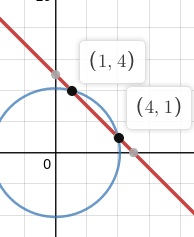

##### Let's solve it manually to check
1. We start by finding the equation to find the x-roots, since it is a quadratic functino we will have to x values, and this is great since we know we will have two points of intersection

$y=-x+5 \\ x^2 + (-x+5)^2 = 17 \\ 2x^2 - 10x +25 = 17 \\2x^2 - 10x +8 = 0 $

2. Now equation to find the y-roots

$x = 5+y \\ (5-y)^2 + y^2 = 17 \\2y^2 - 25y+8=0$


In [3]:
eq1 = sym.Eq(2*x**2-10*x+8, 0)
eq2 = sym.Eq(2*y**2-10*y+8, 0)
x_roots = sym.solve(eq1,x)
y_roots = sym.solve(eq2, y)
print(f'''x roots are {x_roots} and the y roots are {y_roots} which match the answer above, note that here the quadratic formula
just finds the roots and doesnt order them into points on the graph like the system solver above''')

x roots are [1, 4] and the y roots are [1, 4] which match the answer above, note that here the quadratic formula
just finds the roots and doesnt order them into points on the graph like the system solver above


In [4]:
eq1 = sym.Eq(2*y + z,-8)
eq2 = sym.Eq(x-2*y-3*z,0)
eq3 = sym.Eq(-x + y + 2*z, 3)
result = sym.solve((eq1, eq2, eq3), (x,y,z))
display(eq1, eq2, eq3)
result

## Finding the inverse of a matrix
An inverse of a matrix is a matrix that if it got 
multiplied by the original matrix would equal the identity matrix 
$M * M^{-1} = I$

Not all matrices have inverses.

Note that finding the inverse programmically can give you an inverse that is correct numerically, but is not the same inverse you would get if you were solving for the inverse by hand, this is especially problamatic when you want to find the poles of a transfer function (some fancy math thing).
In that case you have to factor with the gaussian flag for every element of the matrix. For example for matrix m:

```
m_inv = m.inv()
m_inv_proper = m.applyfunc(lambda e: sy.factor(e, gaussian=True))
```
I have wrote a `get_inverse` function in the MatrixFunctions.ipynb file.

In [5]:
# example of a matrix that has an inverse 
m = [
    [1,-1],
    [1, 2]
]
m_np = np.array(m)
display("With numpy", np.linalg.inv(m_np))

m_sym = sym.Matrix(m).inv()
display("with sympy", m_sym)

'With numpy'

array([[ 0.66666667,  0.33333333],
       [-0.33333333,  0.33333333]])

'with sympy'

⎡2/3   1/3⎤
⎢         ⎥
⎣-1/3  1/3⎦

In [6]:
# example of a matrix that DOESN'T have an inverse 
m = [
    [1,-1],
    [2, -2]
]
print('''the error we get for trying to find the inverse of a matrix doesnt have an inverse \n''')

try:
    m_np = np.array(m)
    display("With numpy", np.linalg.inv(m_np))
except Exception as e:
    err = f" numpy error is: {str(type(e).__name__)} {str(e)} \n"
    print(err)
    
try:
    m_sym = sym.Matrix(m).inv()
    display("with sympy", m_sym)
except Exception as e:
    err = f" Sympy error is: {str(type(e).__name__)} {str(e)}"
    print(err)


the error we get for trying to find the inverse of a matrix doesnt have an inverse 

 numpy error is: LinAlgError Singular matrix 

 Sympy error is: NonInvertibleMatrixError Matrix det == 0; not invertible.


In [7]:
def get_inverse(m):
    '''
    Takes in a matrix t and returns the inverse assuming it exists, the inverse will have it's poles
    seperated by a gaussian dividtion by the determinent
    Params:
        m (list or sympy.Matrix)
    Returns:
        (sympy.Matrix) Inverted matrix or None if matrix doesnt exist
        
    '''
    m = sy.Matrix(m)
    if sy.det(m)!=0:
        m = m.inv()
        m = m.applyfunc(lambda e: sy.factor(e, gaussian=True))
    else:
        print("Not invertable, det=0")
        return None
    return m
    

## Characteristic equations (Eigenvalues and Eigenvectors)

If matrix `A` was multiplied with vector `x` and the result is `x` times some constant, then we say that `x` is an eigen vector and that constant is an eigen value of matrix `A`, we call that constant lambda. In other words, if a vector times a matrix results in a vector on the _same_ line as the original vector but with a different size, then that origianl vector is an eigen vector and the size difference is the eign value of the matrix. Since `A` times `x` are on the same line as `x` then we say that they are on the same _span_.  

I found a neat youTube video here is a screenshot from it [video link](https://youtu.be/5UjQVJu89_Q?t=136) The rotated and scaled image below is NOT an eign vector, but the one the is ONLY scaled is an eign vector
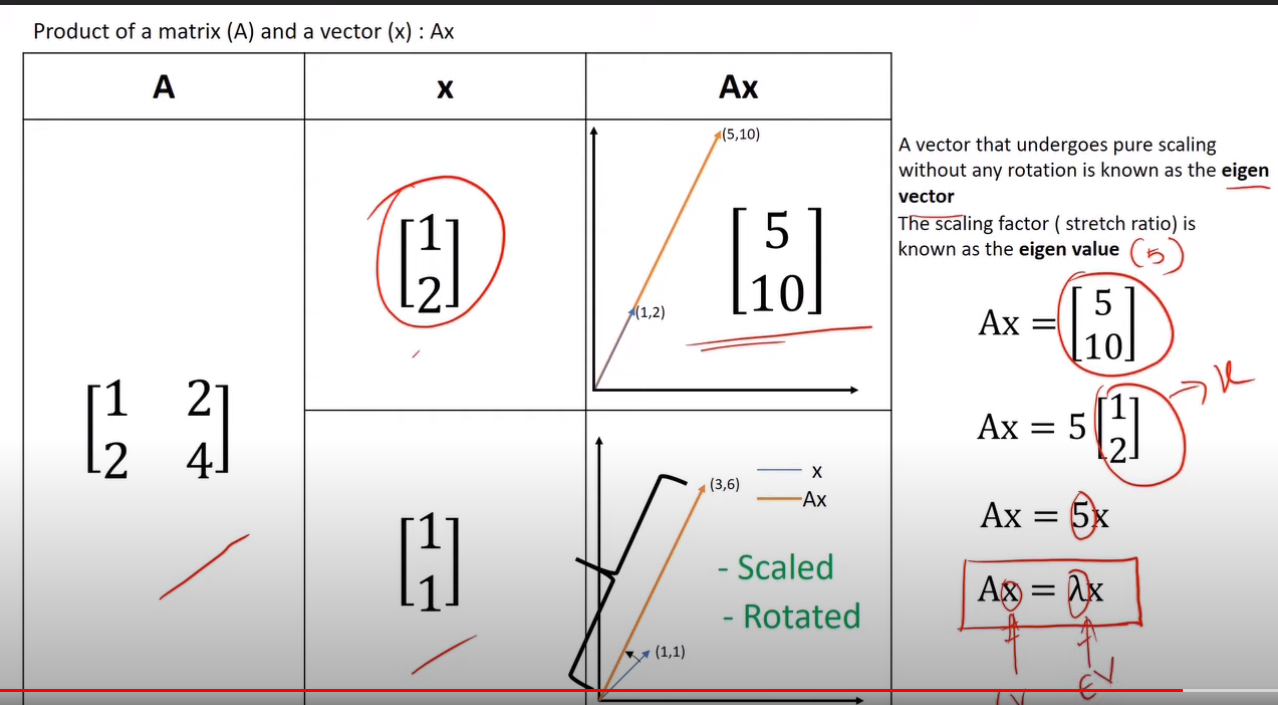

### How to manually find eign vectors and values
Find eign vectors `x` of matrix `A` by solving $(A-\lambda I)=0$  where $I$ is the identitiy matrix.

To find eign values solve this equation for $\lambda$, (this letter s called lambda) $det(A-\lambda I)=0$
This equation is called the _characteristic equation_ and if you write it without putting "= 0" at the end then it's called characteristic polynomial.

Char polynomial: $det(A-\lambda I)$  

Char equation: $det(A-\lambda I) = 0$

To find eign values some conditions have to be met:
1. $(A-\lambda I)$ is not invertable  (doesn't have an inverse matrix)
2. `x` vector must be nonzero 
3. $(A-\lambda I)x$ must have non-zero solutions (non-trivial solutions)  

In [8]:
# Finding Eignvalues and Eignvectors with Sympy
A = [
    [ 0, 1],
    [-6, 5]
]
print(f"For matrix {A} the eignvalues are 2 and 3, let's see how sympy and numpy display them")
sym_A = sym.Matrix(A)

# the eignvectos and values methods give us more info that what we want
# such as multiplicity of eignvalues, if we want to remvoe that
# we have to add some stuff rather than just 
# calling .eigenvals() and vects
# https://stackoverflow.com/questions/43689076/how-to-find-the-eigenvalues-and-eigenvectors-of-a-matrix-with-sympy

sym_eignvals = list(sym_A.eigenvals().keys())
sym_eignvects = [list(tup[2][0]) for tup in sym_A.eigenvects()]
display("Sympy eigenvalues: ", sym_eignvals)
display("Sympy eigenvectors: ", sym_eignvects)


For matrix [[0, 1], [-6, 5]] the eignvalues are 2 and 3, let's see how sympy and numpy display them


'Sympy eigenvalues: '

'Sympy eigenvectors: '

In [9]:
# Numpy finding Eigen stuff, you can also use Scipy library
A_np = np.array(A)
np_vals, np_vects = np.linalg.eig(A_np)
display("Numpy eigenvals: ", np_vals)
display("Numpy eigenvects: ", np_vects)

'Numpy eigenvals: '

array([2., 3.])

'Numpy eigenvects: '

array([[-0.4472136 , -0.31622777],
       [-0.89442719, -0.9486833 ]])

The symbolic solution with numpy is more accurate than numeric solution by numpy
https://stackoverflow.com/questions/28727717/how-are-numpy-eigenvalues-and-eigenvectors-computed

## Linear Algebra stuff

Kernal is also called null space of a matrix.
Image, aka, range of a matrix is the column space of a matrix.
https://www.youtube.com/watch?v=4SlMWZxgZFE&ab_channel=Griti 